## Guidelines

Le prime celle qui in basso, in [questa](http://localhost:8888/notebooks/charts.ipynb#Setting-Up) sezione, hanno lo scopo di scaricare e installare i pacchetti (se non già presenti) e di importare moduli e file csv.


Nel blocco di codice in cui si stampa ogni grafico, ci saranno commentate le label e le intestazioni, perché il grafico viene esportato in `.svg` nella cartella `/charts/` e viene aggiunto in una fase successiva, durante la creazione della presentazione.

## Setting Up

In [161]:
import sys  
!{sys.executable} -m pip install squarify


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip


In [2]:
columns_mapping = {"Gioco": "name", "Genere": "genre", "Produzione*": "production", "Origine": "from_where", "prezzo(€)": "price_in_euro", "Vendite stimate(k)": "sales_k", "max giocatori": "max_players", "recensioni positive(%)": "reviews"}

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

In [32]:
def fillempty_floats(df, columns):
    for column in columns:
        df[column] = df[column].replace('', 0)
        df[column] = df[column].astype('float32')
    return df

def build_chart_path(name):
    return f"charts/{name}.svg"

In [182]:
games = pd.read_csv("data/2024-games.csv", na_filter=False)
games.drop(columns=["Unnamed: 8", "note"], inplace=True)
games.rename(columns=columns_mapping, inplace=True)
games = fillempty_floats(games, ["price_in_euro", "sales_k", "max_players", "reviews"])

In [183]:
sales_aaa_aa = games.query('production == "AA" or production == "AAA"')

## Stima vendite AAA 2024

In [127]:
max_cap = 5000

def cap_values(value, max_cap):
    return min(value, max_cap) if value > max_cap else value

In [128]:
sales_aaa = sales_aaa_aa.query('production == "AAA" and sales_k > 0')
sales_aaa['capped_sales'] = sales_aaa.apply(lambda x: cap_values(x['sales_k'], max_cap), axis=1)

sales_aaa

/var/folders/38/f7xqds1j4yx06zmz7ht8r3c40000gn/T/ipykernel_61024/2155849701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_aaa['capped_sales'] = sales_aaa.apply(lambda x: cap_values(x['sales_k'], max_cap), axis=1)


,name,Genere (principale),production,from_where,price_in_euro,sales_k,max_players,reviews,capped_sales
10,Call of Duty: Black Ops 6,PVP shooter,AAA,America,80.0,15552.0,315334.0,57.0,5000.0
11,Concord,PVP shooter,AAA,America,40.0,16.0,697.0,66.0,16.0
12,Dragon Age: The Veilguard,role-playing game,AAA,America,60.0,946.0,89418.0,70.0,946.0
13,Black Myth: Wukong,action-adventure,AAA,Cina,60.0,29922.0,2415714.0,96.0,5000.0
14,Star Wars Outlaws,action-adventure,AAA,Europa,70.0,28.0,2492.0,67.0,28.0
15,Silent Hill 2,horror,AAA,Europa,70.0,475.0,23676.0,93.0,475.0
16,Skull and Bones,MMO,AAA,Europa,60.0,35.0,2615.0,65.0,35.0
17,Suicide Squad: Kill the Justice League,PVE shooter,AAA,Europa,70.0,250.0,13459.0,67.0,250.0
18,S.T.A.L.K.E.R 2: Hearth of Chornobyl,shooter,AAA,Europa,60.0,1133.0,121335.0,78.0,1133.0
19,Dragon Ball: Sparkling! Zero,fighting,AAA,Giappone,70.0,1462.0,122554.0,89.0,1462.0


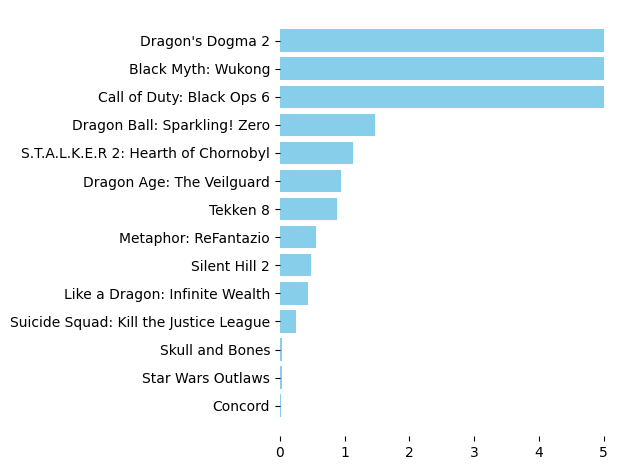

In [129]:
sales_aaa = sales_aaa.sort_values(by=['capped_sales'])
plt.barh(sales_aaa['name'], sales_aaa['capped_sales']/1000, color='skyblue')

for spine in plt.gca().spines.values(): spine.set_visible(False)

# plt.title('Stima vendite delle major releases del 2024')
# plt.xlabel('MILIONI di copie vendute')
# plt.ylabel('')

plt.tight_layout()

# plt.show()
plt.savefig(build_chart_path("sales_aaa_2024"), format="svg")

#### Note:
aggiungere a mano un + dopo il 5000 della scala;
segnare a mano le vendite degli ultimi 3: 35, 28, 16
marcare i primi 4 di colore diverso per far capire che superano la scala

##### Problema:
in entrambi i grafici è difficile contare il numero di vendite.
##### Suggerimento:
aggiungere linee verticali sugli assi

## Vendite giochi per continente di origine

([<matplotlib.patches.Wedge at 0x1092fa930>,
 [Text(0.46474608071218804, 0.37948791873083443, 'America'),
  Text(0.11871015948175279, 0.5881393525652036, 'Asia'),
  Text(0.11661510546000131, 0.5885583379568696, 'Australia'),
  Text(-0.37689794056128706, 0.46684895030476453, 'Cina'),
  Text(-0.388509879864114, -0.4572308752129188, 'Europa'),
  Text(0.4607554457050814, -0.38432332644937356, 'Giappone')],
 [Text(0.9682210014837251, 0.7905998306892383, '21.8%'),
  Text(0.24731283225365164, 1.225290317844174, '0.1%'),
  Text(0.24294813637500273, 1.2261632040768116, '0.0%'),
  Text(-0.7852040428360147, 0.9726019798015928, '27.8%'),
  Text(-0.8093955830502375, -0.9525643233602475, '28.2%'),
  Text(0.9599071785522529, -0.8006735967695283, '22.1%')])

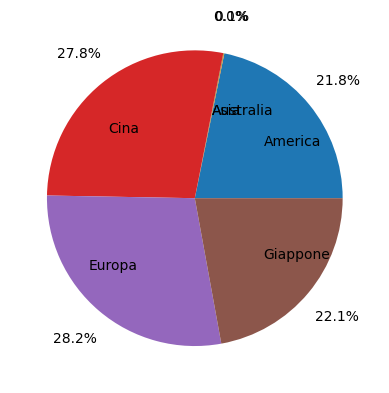

In [184]:
agg_by_continent = games.groupby(['from_where'])['sales_k'].sum().to_frame().reset_index()

# agg_by_continent

fig, ax = plt.subplots()
ax.pie(agg_by_continent['sales_k'], labels=agg_by_continent['from_where'], autopct='%1.1f%%', pctdistance=1.25, labeldistance=.6)

#### Note

Sarebbe meglio raggruppare Singapore+Giappone+Corea in Asia? Magari creiamo due label distinte:

1. Cina
2. Asia (senza Cina)

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

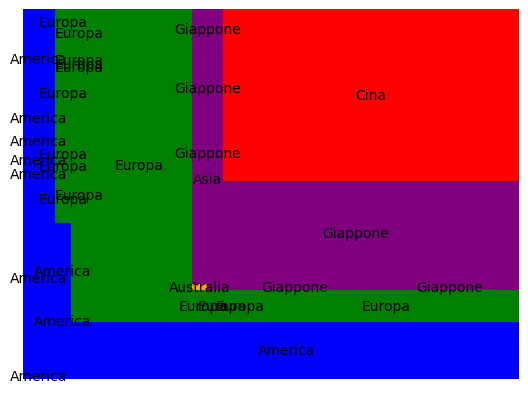

In [231]:
country_map = {
    "America": "blue",
    "Cina": "red",
    "Europa": "green",
    "Giappone": "purple",
    "Asia": "purple",
    "Corea": "purple",
    "Australia": "orange"
}

games['color'] = games['from_where'].apply(lambda x: country_map[x])
ordered = games.sort_values(by=['color'])

squarify.plot(sizes=ordered['sales_k'], label=ordered['from_where'], color=ordered['color'])
plt.axis("off")

#### Note

Tralasciando i colori che sono pessimi e vanno cambiati (è giusto per dare l'idea), non sono sicuro possa andar bene come grafico. 
In questo caso magari non sono tutti uniti quindi è ancora più confusionario, ma magari meglio un area plot?